In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor


In [ ]:
# read input file
filepath = "space_mountain_with_holiday_weather_lag_suite.csv"
df = pd.read_csv(filepath)


In [27]:
# one hot encode the Day of Week column
df = pd.get_dummies(df, columns=['Day of Week']) 


In [28]:
train_years = ['14', '15', '16', '17', '18', '19', '22']
test_years = ['23', '24', '25']

df['Date'] = pd.to_datetime(df['Date'])  # Let pandas infer the ISO format
df['Year'] = df['Date'].dt.year.astype(str).str[-2:]
df = df[df['Time of Day'] >= 450]
df['Time_sq'] = df['Time of Day'] ** 2
df['Time_sin'] = np.sin(2 * np.pi * df['Time of Day'] / 1440)
df['Time_cos'] = np.cos(2 * np.pi * df['Time of Day'] / 1440)

train_df = df[df['Year'].isin(train_years)]
test_df = df[df['Year'].isin(test_years)]


/var/folders/8s/20c0n_q12hn526d83_c5qk0h0000gn/T/ipykernel_6570/3003486332.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])  # Let pandas infer the ISO format


In [29]:
y_train = train_df['Wait Time'].values
X_train = train_df.drop(columns=['Wait Time', 'Date', 'Time', 'Year'])
y_test = test_df['Wait Time'].values
X_test = test_df.drop(columns=['Wait Time', 'Date', 'Time', 'Year'])

print(X_train.head())


   Month  Time of Day  Is_Holiday  Is_Holiday_Adjacency  Temperature  \
1     12          510       False                 False         13.6   
2     12          540       False                 False         11.9   
3     12          570       False                 False         11.9   
4     12          600       False                 False         15.4   
5     12          630       False                 False         15.4   

   Precipitation  Lag_Wait_Time  Day of Week_Friday  Day of Week_Monday  \
1            0.0            6.0               False               False   
2            0.0           12.0               False               False   
3            0.0           10.0               False               False   
4            0.0           29.0               False               False   
5            0.0            7.0               False               False   

   Day of Week_Saturday  Day of Week_Sunday  Day of Week_Thursday  \
1                 False                True    

In [30]:
model = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [31]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("XGBoost RMSE: {:.2f}".format(rmse))


XGBoost RMSE: 16.91


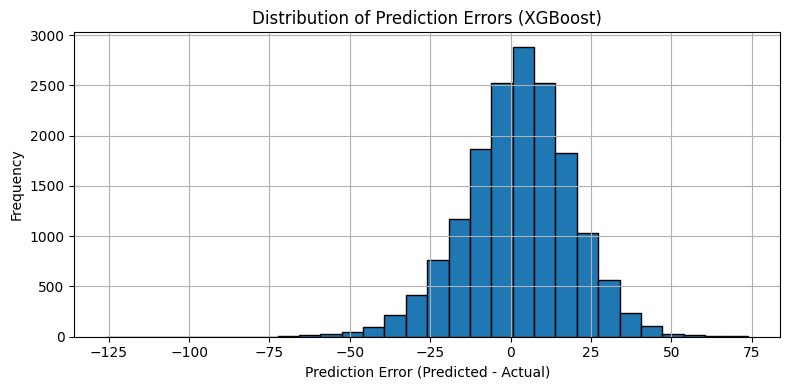

In [32]:
errors = y_pred - y_test
plt.figure(figsize=(8, 4))
plt.hist(errors, bins=30, edgecolor='black')
plt.title("Distribution of Prediction Errors (XGBoost)")
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
